In [1]:
#Importing packages
using Plots
using StatsBase
using StatsPlots
using Distributions
using LinearAlgebra
using LaTeXStrings

## Spacing Ratio
The spacing distribution is largely dependent on the matrix size. We have seen that as the matrix dimension grows, the deviation from the surmise function increases. To avoid this deviation, a new quantity has been used to describe the distribution of eigenvalues. The new quantity is the ratio between consecutive spacings. If we have ordered energy eigenvalues $E=(e_1,e_2,e_3\ldots)$ such that $e_i \leq e_j$ for $i<j$ and the nearest neighbour spacing $s_n = e_{n+1}-e_{n}$, then we define the spacing ratio as: 
$$r = \frac{s_n}{s_{n-1}}$$
We can also use the quantity $$\tilde r = \frac{\min (s_n,s_{n-1})}{\max (s_n,s_{n-1})}$$
The analytic surmise function $P_w(r) $ is of the form: 
$$P_W(r) = \frac{1}{Z_ \beta} \frac{(r+r^2)^\beta}{(1+r+r^2)^{1+\frac{3}{2} \beta}}$$ 


where $\beta$ is the Dyson index. For GOE, $\beta = 1$ and for GUE, $\beta = 2$

$Z_ \beta$ is the normalisation constant. 
\begin{align}
Z_ \beta &= 8/27 && (for\  GOE) \\
 &= 4 \pi / 81 \sqrt3 && (for \ GUE)
\end{align}

In [31]:
#defining GOE hamiltonian of dimension nxn
function Ham(n)
    A=rand(Normal(0,1), n,n)
    Q=(A+transpose(A))/2
    eigvals(Q)/sqrt(n)
end

#defining GuE hamiltonian of dimension nxn
function Ham1(n)
    H=complex(zeros(n,n))
    for i = 1:n
        for j = 1:n
            if i==j
                H[i,j]=rand(Normal(0,1))
            elseif i<j
                    H[i,j]=rand(Normal(0,1))+rand(Normal(0,1))im
                    H[j,i]=conj(H[i,j])
                end
            end
        end
    p=eigvals(H)/sqrt(n)
    p
    end

#function which returns array of spacing ratio for GOE
function spacings_ratio(n,t)
    l=[]
    trial=t
    for i = 1:trial
        p=sort(Ham(n))
        for i =2:length(p)-1
            s=(p[i+1]-p[i])/((p[i]-p[i-1]))
            append!(l,s)
        end
    end
    l
end
#function which returns array of spacing ratio r~ for GOE
function spacings_ratio_tilde(n,t)
    l=[]
    trial=t
    for i = 1:trial
        p=sort(Ham(n))
        for i =2:length(p)-1
            r_ti=minimum([p[i+1]-p[i],p[i]-p[i-1]])/maximum([p[i+1]-p[i],p[i]-p[i-1]])
            append!(l,r_ti)
        end
    end
    l
end

#function which returns array of spacing ratio for GUE
function spacings_ratio_GUE(n,t)
    l=[]
    trial=t
    for i = 1:trial
        p=sort(Ham1(n))
        for i =2:length(p)-1
            s=(p[i+1]-p[i])/((p[i]-p[i-1]))
            append!(l,s)
        end
    end
    l
end
#function which returns array of spacing ratio r~ for GUE
function spacings_ratio_tilde_GUE(n,t)
    l=[]
    trial=t
    for i = 1:trial
        p=sort(Ham1(n))
        for i =2:length(p)-1
            r_ti=minimum([p[i+1]-p[i],p[i]-p[i-1]])/maximum([p[i+1]-p[i],p[i]-p[i-1]])
            append!(l,r_ti)
        end
    end
    l
end


#Wigner surmise function for ratio spacing r
function f(r)
    return ((3.375)*(r+r^2))/((1.0+r+r^2)^2.5)
end
#Wigner surmise function for ratio spacing r~
function f1(r)
    return ((81*sqrt(3)/(4*pi))*(r+r^2)^2)/((1.0+r+r^2)^4)
end

f1 (generic function with 1 method)

In [36]:
#Defining a function which takes n=matrix dimension and t=number of trials as parameters and return the plot of ratio distribution for GOE, the deviation and the mean of ratio
function plotting(n,t)
    l2=spacings_ratio(n,t);
    l21=sort(l2);
    a=findall(x->x<6, l21);
    ind=length(a)
    l22=l21[1:ind]
    hist_obj2 = fit(Histogram, l22/1, nbins=1000);
    h2=normalize(hist_obj2);
    s=h2.edges[1][1]
    e=h2.edges[1][length(h2.edges[1])]
    x2=LinRange(s,e,length(h2.weights))
    y2=f.(x2)
    h2.weights=h2.weights/1.05
    p=plot(x2,y2, label="analytic P(r)")
    q=plot!(x2,h2.weights, xlabel="r", ylabel="Probability", title= "Ratio distribution for GOE (N=$n)",label="numeric")
    s2=h2.weights.-y2;
    q, s2, x2, mean(l2)
  end
  

plotting (generic function with 1 method)

In [37]:
#Defining a function which takes n=matrix dimension and t=number of trials as parameters and return the plot of ratio distribution r~ for GUE, the deviation and the mean
function plotting1(n,t)
    l2=spacings_ratio_GUE(n,t);
    l21=sort(l2);
    a=findall(x->x<6, l21);
    ind=length(a)
    l22=l21[1:ind]
    hist_obj2 = fit(Histogram, l22/1, nbins=1000);
    h2=normalize(hist_obj2);
    s=h2.edges[1][1]
    e=h2.edges[1][length(h2.edges[1])]
    x2=LinRange(s,e,length(h2.weights))
    y2=f1.(x2)
    p=plot(x2,y2, label="analytic P(r)")
    q=plot!(x2,h2.weights, xlabel="r", ylabel="Probability", title= "Ratio distribution for GUE (N=$n)",label="numeric")
    s2=h2.weights.-y2;
    q, s2, x2, mean(l2)
  end
  

plotting1 (generic function with 1 method)

In [43]:
#Defining a function which takes n=matrix dimension and t=number of trials as parameters and return the plot of ratio distribution r~ for GOE, the deviation and the mean
function plotting_tilde(n,t)
    l2=spacings_ratio_tilde(n,t);
    l21=sort(l2);
    a=findall(x->x<6, l21);
    ind=length(a)
    l22=l21[1:ind]
    hist_obj2 = fit(Histogram, l22/1, nbins=1000);
    h2=normalize(hist_obj2);
    s=h2.edges[1][1]
    e=h2.edges[1][length(h2.edges[1])]
    x2=LinRange(s,e,length(h2.weights))
    q=plot(x2,h2.weights, xlabel=L"$\tilde r$", ylabel="Probability", title= "Ratio distribution for GOE (N=$n)",label="numeric")
    q, x2, mean(l2)
  end
  

plotting_tilde (generic function with 1 method)

In [72]:
#Defining a function which takes n=matrix dimension and t=number of trials as parameters and return the plot of ratio distribution, the deviation and the mean
function plotting_tilde1(n,t)
    l2=spacings_ratio_tilde_GUE(n,t);
    l21=sort(l2);
    #l21=sort(l2)
    a=findall(x->x<6, l21);
    ind=length(a)
    l22=l21[1:ind]
    hist_obj2 = fit(Histogram, l22/1, nbins=1000);
    h2=normalize(hist_obj2);
    s=h2.edges[1][1]
    e=h2.edges[1][length(h2.edges[1])]
    x2=LinRange(s,e,length(h2.weights))
    #y2=f.(x2)
    #p=plot(x2,y2, label="analytic P(r)")
    q=plot(x2,h2.weights, xlabel=L"$\tilde r$", ylabel="Probability", title= "Ratio distribution for GUE (N=$n)",label="numeric")
    #s2=h2.weights.-y2;
    q, x2, mean(l2)
  end
  

plotting_tilde1 (generic function with 1 method)

In [45]:
q,s,x, m= plotting(5,10000000);
q1,s1,x1, m1= plotting(10,1000000);
q2,s2,x2, m2= plotting(100,100000);
q3,s3,x3, m3= plotting(1000,10000);

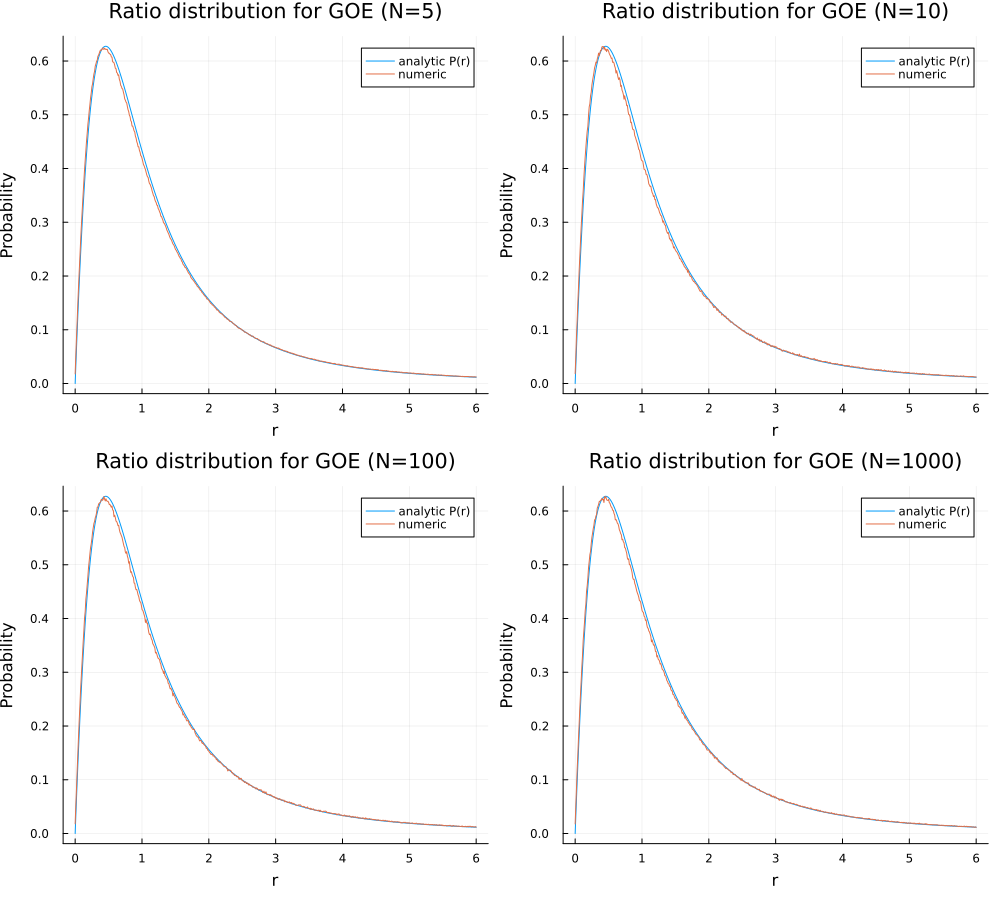

In [52]:
plot(q,q1,q2,q3,size=(1000,900))

We now see the deviation $P_{num}(r)- P_W(r)$. We see that the deviation is almost same, irrespective of matrix dimension. Thus, this gives a better picture than the actual spacing distribution. The deviation plot of spacing ratio is also similar in shape to the deviation of actual spacing distribution. 

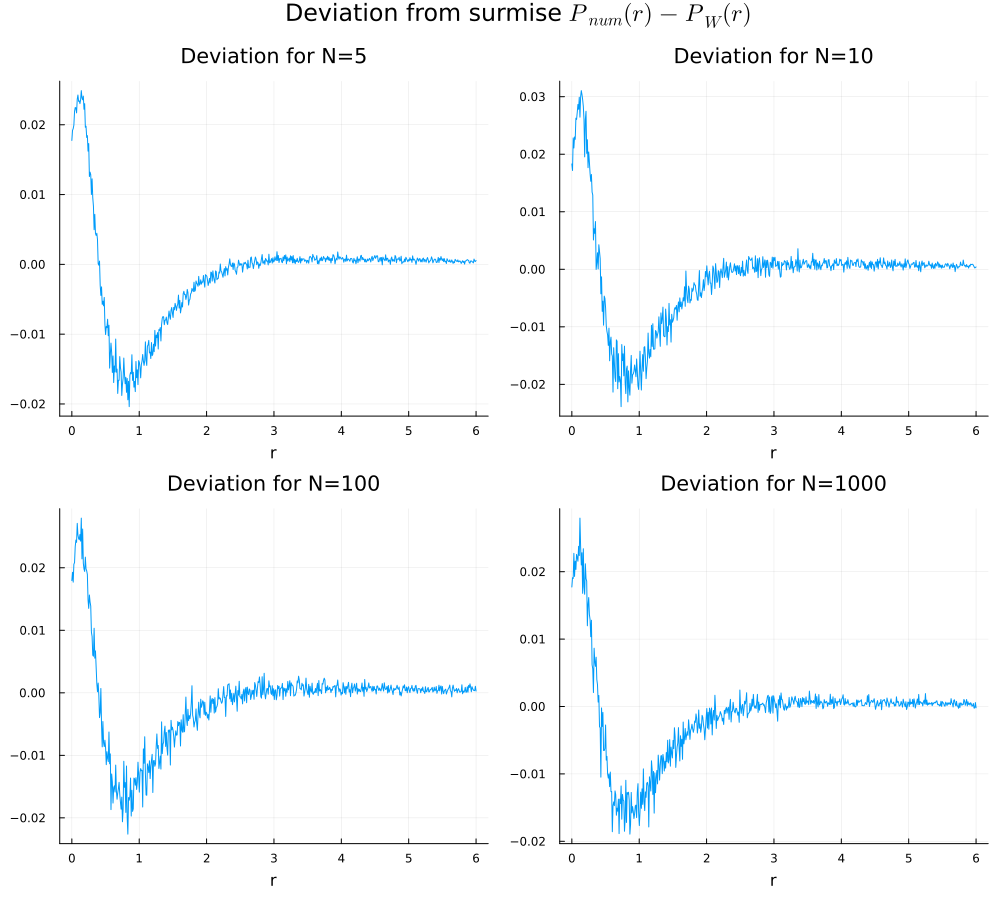

In [63]:
dev=plot(x,s, title="Deviation for N=5", xlabel="r", label="")
dev1=plot(x1,s1,title="Deviation for N=10",xlabel="r", label="")
dev2=plot(x2,s2,title="Deviation for N=100",xlabel="r",label="")
dev3=plot(x3,s3,title="Deviation for N=1000",xlabel="r", label="")
plot(plot_title=L"Deviation from surmise $P_{num}(r)-P_W(r)$ ", dev,dev1,dev2,dev3,size=(1000,900))
#savefig("deviation ratio spacing.png")

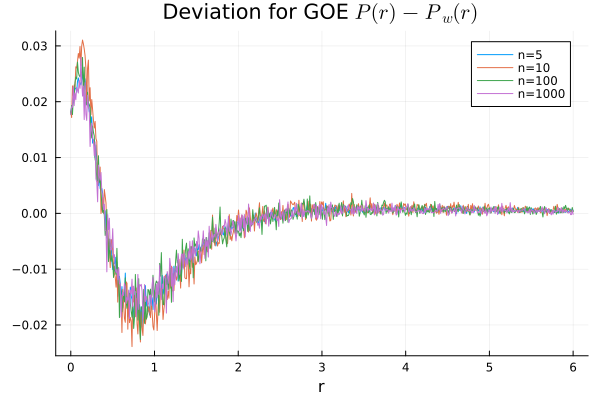

In [64]:
plot(x,s,label="n=5")
plot!(x1,s1, xlabel="r", title=L"Deviation for GOE $P(r)-P_w(r)$", label="n=10")
plot!(x2,s2,label="n=100")
plot!(x3,s3,label="n=1000")

We now see the mean obtained from our numeric calculation. The ratio distribution has a characteristic mean. 
\begin{align}
\langle r \rangle _W &=1.75 &&\text{for GOE} \\
&=1.36 &&\text{for GUE}
\end{align}

\begin{align}
\langle \tilde r \rangle _W &=0.53 &&\text{for GOE} \\
&=0.60 &&\text{for GUE}
\end{align}



In [65]:
m,m1,m2,m3

(1.7796056093165225, 1.7826603133313865, 1.7789426107667532, 1.7804802609063572)


Mean for GOE ratio spacing

\begin{array}{|c|c|c|c|c|}
\hline
N & 5 & 10 & 100 & 1000 \\
\hline
\langle r \rangle & 1.7796 &  1.7827 &  1.7789 & 1.7805\\
\hline
\end{array}

We now see the ratio distribution of $\tilde r$

In [67]:
qt,xt, mt= plotting_tilde(5,10000000)
qt1,xt1, mt1= plotting_tilde(10,1000000)
qt2,xt2, mt2= plotting_tilde(100,100000)
qt3,xt3, mt3= plotting_tilde(1000,10000)

(Plot{Plots.GRBackend() n=1}, LinRange{Float64}(0.0, 1.0, 1000), 0.5306754955281152)

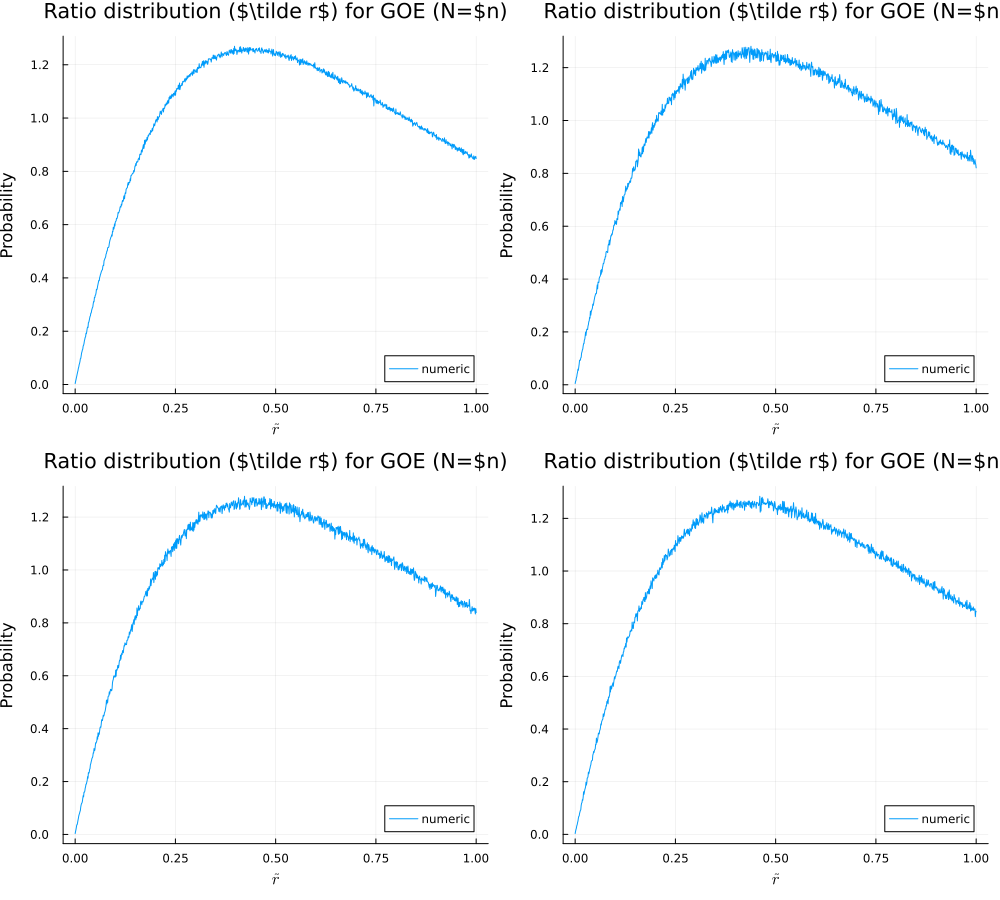

In [68]:
plot(qt,qt1,qt2,qt3,size=(1000,900))

In [79]:
(mt,mt1,mt2,mt3)

(0.5301745167468114, 0.5289372972371057, 0.5304999830784435, 0.5306754955281152)


Mean for GOE ratio spacing

\begin{array}{|c|c|c|c|c|}
\hline
N & 5 & 10 & 100 & 1000 \\
\hline
\langle \tilde r \rangle & 0.5302 &  0.5289 &  0.5305 & 0.5307\\
\hline
\end{array}

In [71]:
qu,su,xu, mu= plotting1(5,10000000)
qu1,su1,xu1, mu1= plotting1(10,1000000)
qu2,su2,xu2, mu2= plotting1(100,100000)
qu3,su3,xu3, mu3= plotting1(1000,10000)

(Plot{Plots.GRBackend() n=2}, [0.00025390598815944974, 0.0017562758241087798, 0.0026878488998465233, 0.004699300931446614, 0.005176385733562546, 0.006907784943475118, 0.00760305653740502, 0.009316890608168836, 0.009825804265053778, 0.012184580317882193  …  0.0002296217594324147, 0.0009057243873133447, 0.00044406064799701155, 8.369410620239891e-5, 0.00038322025473414706, 8.326768779761112e-5, 0.0005752434928711289, 0.00023415159524971425, 0.0002990554440772085, 0.00018089535141566082], LinRange{Float64}(0.0, 6.0, 600), 1.3685569737152963)

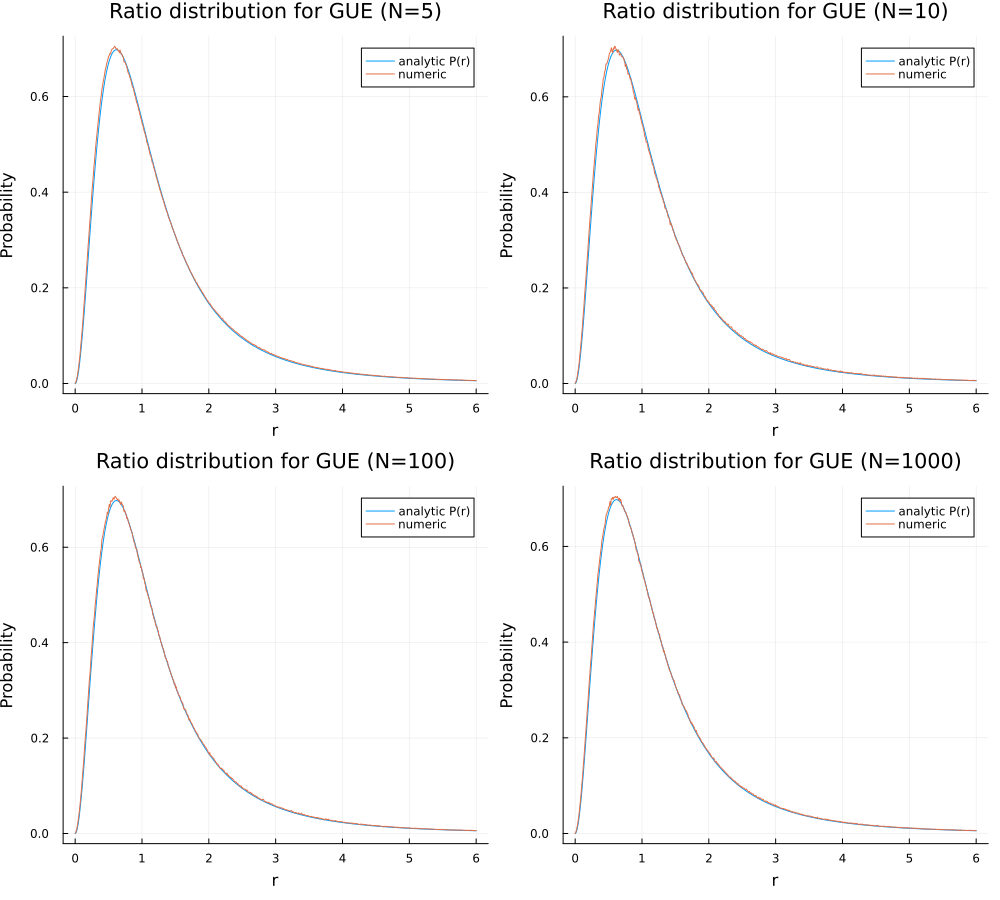

In [76]:
plot(qu,qu1,qu2,qu3,size=(1000,900))
#savefig("ratio spacing GUE.png")

We now calculate the mean for the GUE distribution

In [78]:
(mu,mu1,mu2,mu3)

(1.373018025150034, 1.374813684367928, 1.369140130710368, 1.3685569737152963)


Mean for GUE ratio spacing
\begin{array}{|c|c|c|c|c|}
    \hline
    N & 5 & 10 & 100 & 1000 \\
    \hline
    \langle r \rangle & 1.3730 &  1.3748 &  1.3691 & 1.3686\\
    \hline
    \end{array}

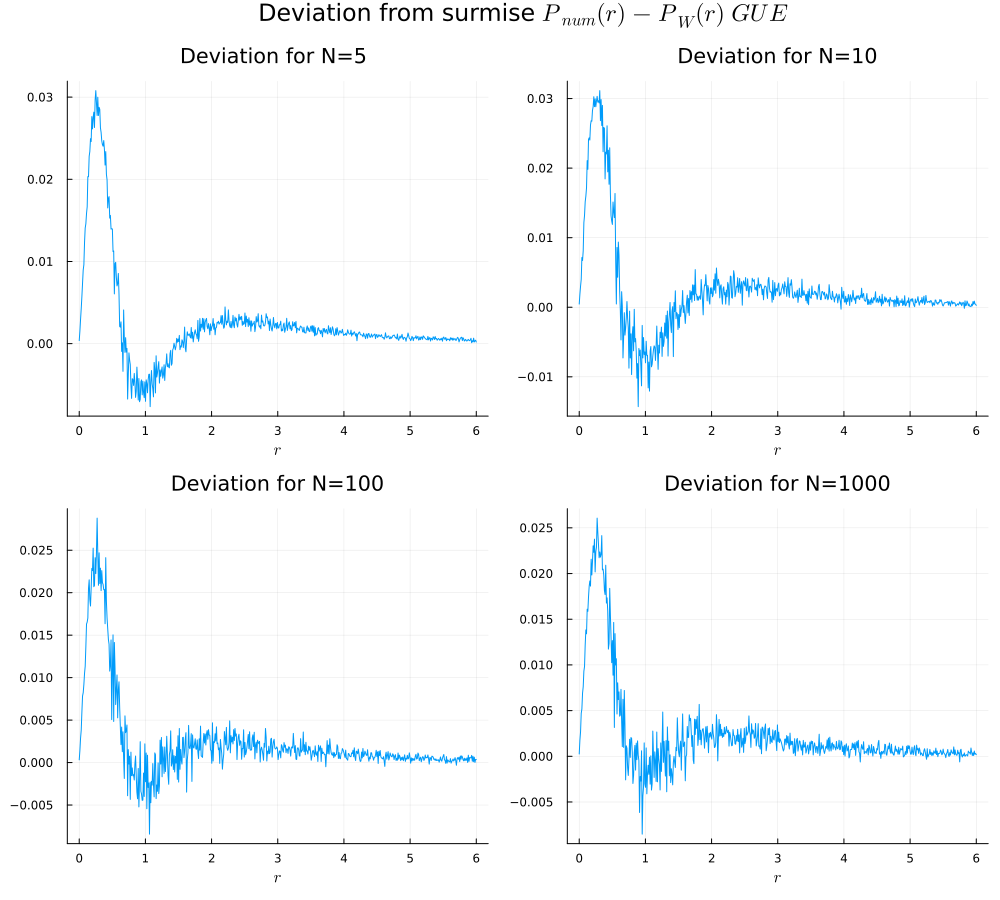

In [85]:
devu=plot(xu,su, title="Deviation for N=5 ", xlabel=L"r", label="")
devu1=plot(xu1,su1,title="Deviation for N=10",xlabel=L" r", label="")
devu2=plot(xu2,su2,title="Deviation for N=100",xlabel=L" r",label="")
devu3=plot(xu3,su3,title="Deviation for N=1000",xlabel=L"r", label="")
plot(plot_title=L"Deviation from surmise $P_{num}(r)-P_W(r) \ GUE$ ", devu,devu1,devu2,devu3,size=(1000,900))
#savefig("deviation ratio spacing gue.png")

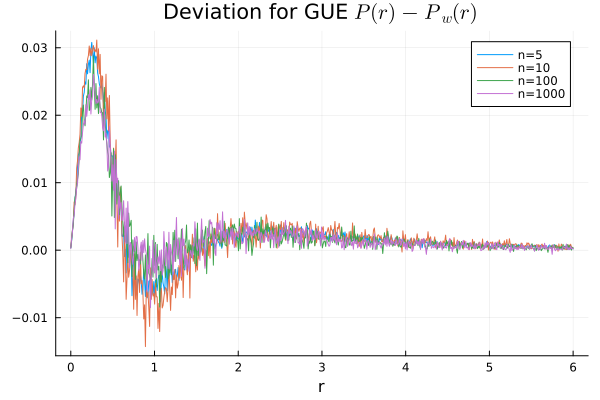

In [87]:
plot(xu,su, label="n=5",xlabel="r", title=L"Deviation for GUE $P(r)-P_w(r)$")
plot!(xu1,su1, label="n=10")
plot!(xu2,su2, label="n=100")
plot!(xu3,su3, label="n=1000")
#savefig("deviation ratio spacing gue together.png")

In [89]:
qut,xut, mut= plotting_tilde1(5,100000)
qut1,xut1, mut1= plotting_tilde1(10,10000)
qut2,xut2, mut2= plotting_tilde1(100,1000)
qut3,xut3, mut3= plotting_tilde1(1000,1000)

(Plot{Plots.GRBackend() n=1}, LinRange{Float64}(0.007, 1.0, 993), 0.5994916775708051)

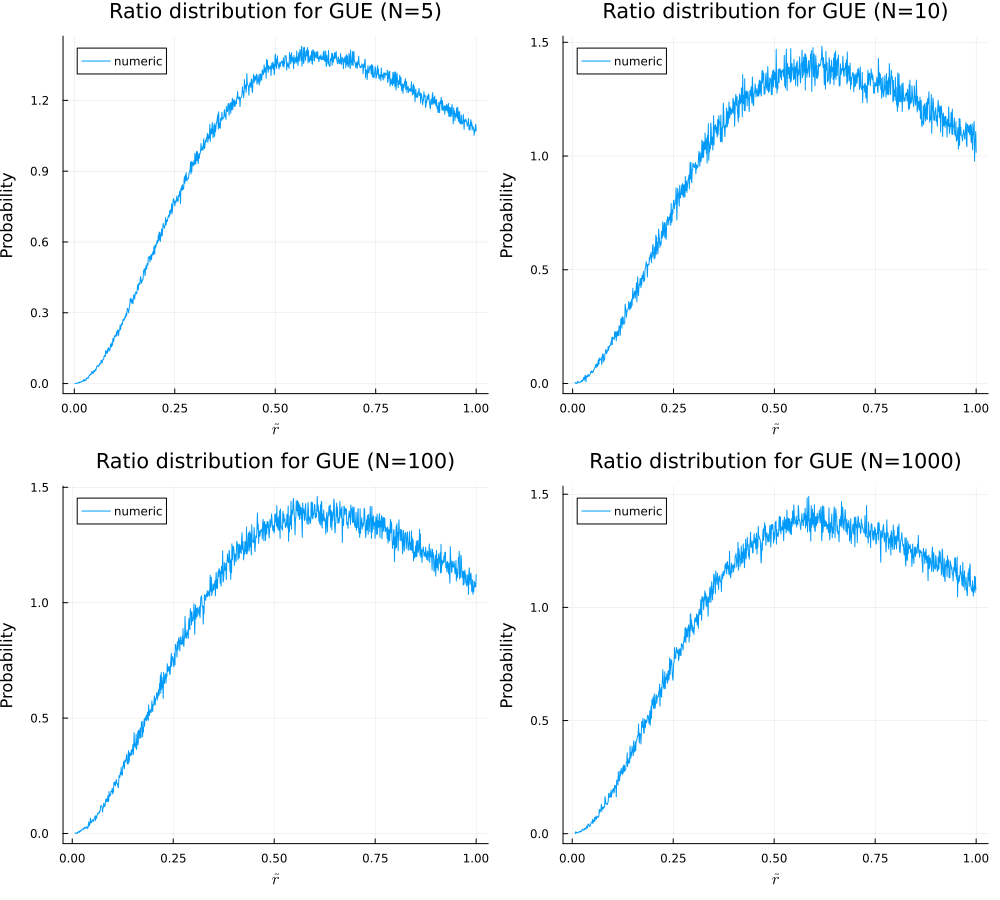

In [100]:
plot(qut,qut1,qut2,qut3,size=(1000,900))
#savefig("ratio spacing GUE tilde.png")

In [101]:
(mut,mut1,mut2,mut3)

(0.5978038302230071, 0.5972441491586047, 0.5991641088773205, 0.5994916775708051)

Mean for GUE ratio $ \tilde r $ spacing
\begin{array}{|c|c|c|c|c|}
    \hline
    N & 5 & 10 & 100 & 1000 \\
    \hline
    \langle \tilde r \rangle & 0.5978 &  0.5972 &  0.5992 & 0.5995\\
    \hline
    \end{array}

In [138]:
#Extracting the data for N=1000 for the distribution of GOE and GUE from the plots
x1 = qut3.series_list[1][:x];
y1 = qut3.series_list[1][:y];
x2 = qt3.series_list[1][:x];
y2 = qt3.series_list[1][:y];
x3 = qu3.series_list[2][:x];
y3 = qu3.series_list[2][:y];
x4 = q3.series_list[2][:x];
y4 = q3.series_list[2][:y];

We now compare the distribution between GOE and GUE for $r$ and $\tilde r$ both. For this, we use the N=1000 data. 

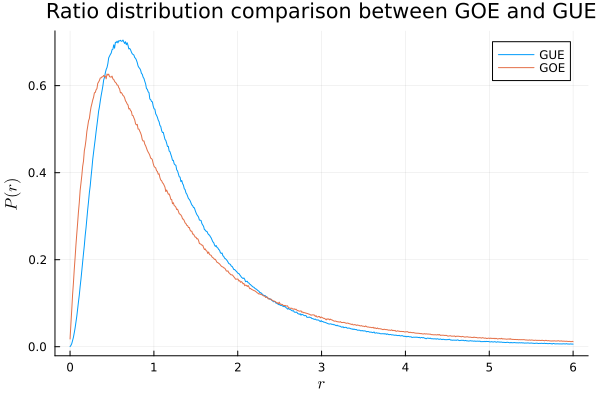

In [142]:
plot(x3,y3, label="GUE", xlabel=L"r", ylabel=L"P(r)", title="Ratio distribution comparison between GOE and GUE")
plot!(x4,y4, label="GOE")

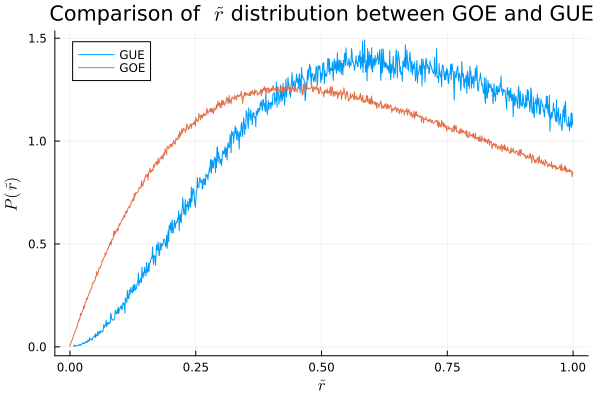

In [130]:
plot(x1,y1, label="GUE", xlabel=L"\tilde r", ylabel=L"P(\tilde r)", title=L"Comparison of  $\tilde r$ distribution between GOE and GUE")
plot!(x2,y2, label="GOE")